In [ ]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!vget -q https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import findspark
findspark.init()
findspark.find()

import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark= SparkSession.builder.appName("Mi primera").getOrCreate()

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,074 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
G

In [ ]:
df = spark.read.csv("/Movies.csv", header=True,inferSchema=True)

In [ ]:
df.printSchema()

root
 |-- movie_id: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- vote_average: double (nullable = true)
 |-- vote_count: integer (nullable = true)
 |-- status: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- revenue: long (nullable = true)
 |-- adult: boolean (nullable = true)
 |-- budget: integer (nullable = true)
 |-- imdb_id: string (nullable = true)
 |-- original_language: string (nullable = true)
 |-- original_title: string (nullable = true)
 |-- overview: string (nullable = true)
 |-- popularity: double (nullable = true)
 |-- genres: string (nullable = true)
 |-- production_companies: string (nullable = true)
 |-- production_countries: string (nullable = true)
 |-- spoken_languages: string (nullable = true)



In [ ]:
#Resumen de los datos
df.describe().show()

+-------+----------------+--------------------+-----------------+------------------+--------+------------+-------------------+--------------------+---------+-----------------+-----------------------------------+--------------------+-----------------+-----------+------------------------+--------------------+--------------------+
|summary|        movie_id|               title|     vote_average|        vote_count|  status|release_date|            revenue|              budget|  imdb_id|original_language|                     original_title|            overview|       popularity|     genres|    production_companies|production_countries|    spoken_languages|
+-------+----------------+--------------------+-----------------+------------------+--------+------------+-------------------+--------------------+---------+-----------------+-----------------------------------+--------------------+-----------------+-----------+------------------------+--------------------+--------------------+
|  count| 

In [ ]:
#filtro de df, muestra las peliculas realizadas en USA y con votación mayor a 5
df.filter((df.vote_average >= 5) | (df.production_countries == "United Stateso")).orderBy(F.desc("release_date")).show()


+--------+--------------------+------------+----------+--------+------------+---------+-----+---------+----------+-----------------+--------------------------+--------------------+----------+--------------------+--------------------+--------------------+--------------------+
|movie_id|               title|vote_average|vote_count|  status|release_date|  revenue|adult|   budget|   imdb_id|original_language|            original_title|            overview|popularity|              genres|production_companies|production_countries|    spoken_languages|
+--------+--------------------+------------+----------+--------+------------+---------+-----+---------+----------+-----------------+--------------------------+--------------------+----------+--------------------+--------------------+--------------------+--------------------+
| 4540659|     Devils Workshop|        5.86|        82|Released|   9/30/2022|        0|false|        0|tt12444934|               en|           Devils Workshop|Desperate for

In [ ]:
#Agrupación simple, grupo de las peliculas por país y la suma de sus ganancias
df.groupBy("production_countries").sum("revenue").orderBy(F.desc("sum(revenue)")).show(truncate=False)

+-----------------------------------------------+------------+
|production_countries                           |sum(revenue)|
+-----------------------------------------------+------------+
|United States of America                       |447115507960|
|United Kingdom United States of America        |50148021908 |
|Canada United States of America                |11844446304 |
|Germany United States of America               |11358859814 |
|China                                          |11282750269 |
|Japan                                          |9070944251  |
|United Kingdom                                 |6709135164  |
|New Zealand United States of America           |6443518817  |
|India                                          |6113453425  |
|China Hong Kong                                |5626952249  |
|United States of America United Kingdom        |5493641132  |
|France United States of America                |5416093002  |
|China United States of America                 |517259

In [ ]:
# con el ejemplo anterior obtengo el promedio de ingresos, maximos y mínimos

df.groupBy("production_countries").avg("revenue").orderBy(F.desc("avg(revenue)")).show(truncate=False)

df.groupBy("production_countries").max("revenue").orderBy(F.desc("max(revenue)")).show(truncate=False)

df.groupBy("production_countries").min("revenue").orderBy(F.desc("min(revenue)")).show(truncate=False)

+-----------------------------------------------------------+------------+
|production_countries                                       |avg(revenue)|
+-----------------------------------------------------------+------------+
|Japan Spain United Kingdom United States of America        |7.88680968E8|
|Canada India Taiwan United Kingdom United States of America|6.09016565E8|
|China Hong Kong Morocco                                    |5.7922056E8 |
|New Zealand United States of America Germany               |5.62363449E8|
|Canada Hong Kong Taiwan United States of America           |5.32950503E8|
|Malta United Kingdom United States of America              |5.31865E8   |
|France Netherlands United Kingdom United States of America |5.27E8      |
|United States of America Malta United Kingdom              |4.97409852E8|
|Canada United States of America New Zealand                |4.90719763E8|
|Canada United States of America Australia                  |4.73990832E8|
|Japan United States of A

In [ ]:
#convertimos a un data frame de pandas
pdf = df.toPandas()

In [ ]:
# vistazo de los prieros datos

pdf.head()
pdf.tail()

,movie_id,title,vote_average,vote_count,status,release_date,revenue,adult,budget,imdb_id,original_language,original_title,overview,popularity,genres,production_companies,production_countries,spoken_languages,Rango
30472,4550482,The Pentagon Wars,7.000,43,Released,2/28/1998,0,False,0,tt0144550,en,The Pentagon Wars,From the director of “Made In America” and “Th...,4.575,Comedy Drama War TV Movie,HBO,United States of America,English,NaN
30473,4550483,Graveyard of Honor,6.310,43,Released,6/22/2002,0,False,0,tt0316599,ja,新・仁義の墓場,A barkeeper saves a Yakuza boss life and thus ...,5.260,Crime Drama Thriller,Toei Video Company Excellent Film Daiei Film,Japan,Japanese,NaN
30474,4550484,Under the Cherry Moon,5.744,43,Released,07/02/1986,10090429,False,0,tt0092133,en,Under the Cherry Moon,Two friends from Miami are in the French Rivie...,6.207,Comedy Music Romance,Warner Bros. Pictures,United States of America,French English,NaN
30475,4550485,My Brother the Devil,6.500,43,Released,1/22/2012,0,False,0,tt2076897,en,My Brother the Devil,Fourteen-year-old Mo is a lonely sensitive boy...,3.206,Drama,None,United Kingdom,English,Alto
30476,4550486,Blackout Love,5.600,43,Released,07/09/2021,0,False,0,tt14625702,it,Blackout Love,Valeria is a woman who never looks back passin...,4.290,Romance Comedy,Groenlandia RAI MiC Amazon Studios,Italy,Italian,NaN


In [ ]:
#descripción de los datos del dataframe
pdf.describe()

,movie_id,vote_average,vote_count,revenue,budget,popularity
count,3.047700e+04,30477.000000,30477.000000,3.047700e+04,3.047700e+04,30477.000000
mean,4.535248e+06,6.387755,649.305509,2.274960e+07,8.282921e+06,13.824050
std,8.798096e+03,0.895899,1836.974304,9.511773e+07,2.463842e+07,38.719752
min,4.520010e+06,1.300000,43.000000,0.000000e+00,0.000000e+00,0.600000
25%,4.527629e+06,5.831000,69.000000,0.000000e+00,0.000000e+00,6.140000
50%,4.535248e+06,6.451000,133.000000,0.000000e+00,0.000000e+00,9.131000
75%,4.542867e+06,7.007000,388.000000,3.826459e+06,4.000000e+06,14.140000
max,4.550486e+06,10.000000,34495.000000,2.923706e+09,4.600000e+08,2994.357000


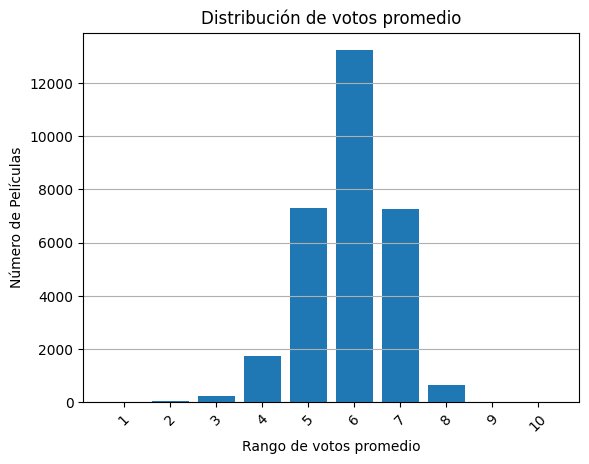

In [ ]:
bins = [1,2,3,4,5,6,7,8,9,10,11]
labels = ['1', '2', '3','4','5','6','7','8','9','10']

pdf['Rango'] = pd.cut(pdf['vote_average'], bins=bins, labels=labels, right=False)

# Contar cuántos estudiantes hay en cada rango
rango_counts = pdf['Rango'].value_counts().sort_index()

# Graficar
plt.bar(rango_counts.index, rango_counts.values)
plt.title('Distribución de votos promedio')
plt.xlabel('Rango de votos promedio')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45)
plt.grid(axis='y')


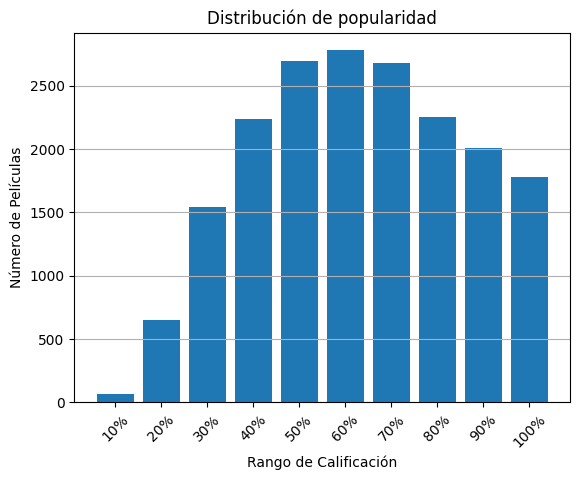

In [ ]:
bins = [1,2,3,4,5,6,7,8,9,10,11]
labels = ['10%', '20%', '30%','40%','50%','60%','70%','80%','90%','100%']

pdf['Rango'] = pd.cut(pdf['popularity'], bins=bins, labels=labels, right=False)

# Contar cuántos estudiantes hay en cada rango
rango_counts = pdf['Rango'].value_counts().sort_index()

# Graficar
plt.bar(rango_counts.index, rango_counts.values)
plt.title('Distribución de popularidad')
plt.xlabel('Rango de Calificación')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45)
plt.grid(axis='y')